In [1]:
import pandas as pd
import os

# Load the data .pkl file from dataset_season folder
df = pd.read_pickle('dataset_season/Season_df.pkl')

In [2]:
df.head()

,Time,Season,Day,Real_Time_Measurement_MW,Forecast
0,2012-02-01 05:00:00,Winter,1,0.0,0.0
1,2012-02-01 05:15:00,Winter,1,0.0,0.0
2,2012-02-01 05:30:00,Winter,1,0.0,0.0
3,2012-02-01 05:45:00,Winter,1,0.0,0.0
4,2012-02-01 06:00:00,Winter,1,0.0,0.0


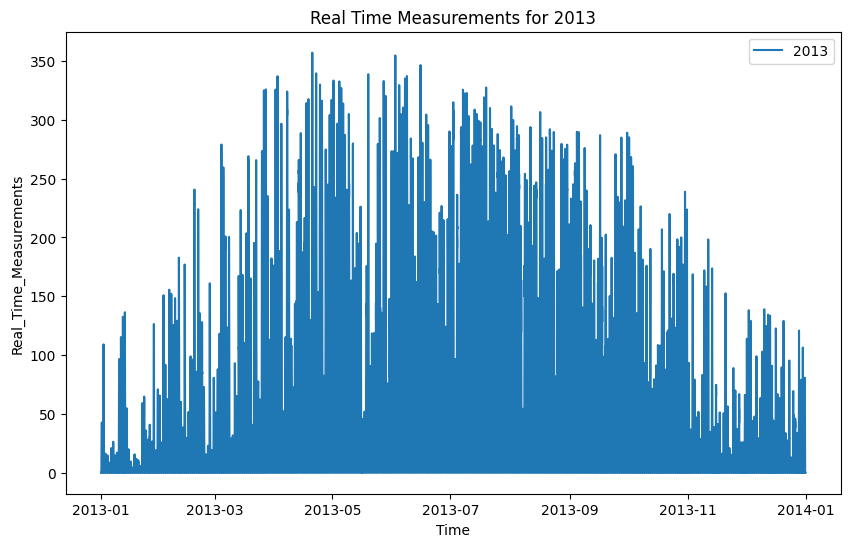

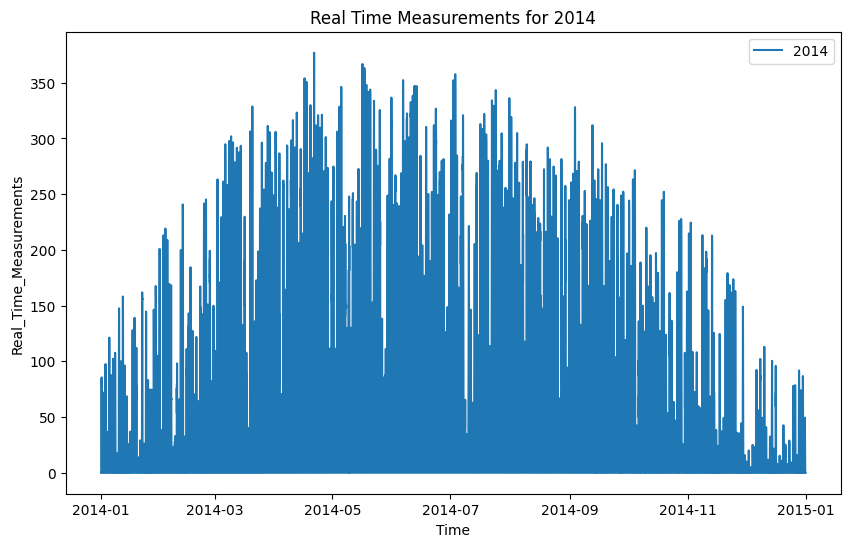

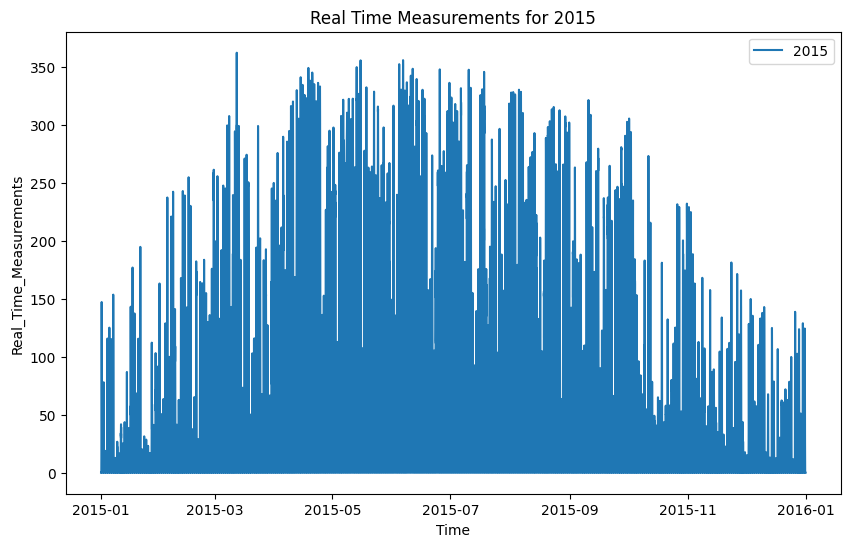

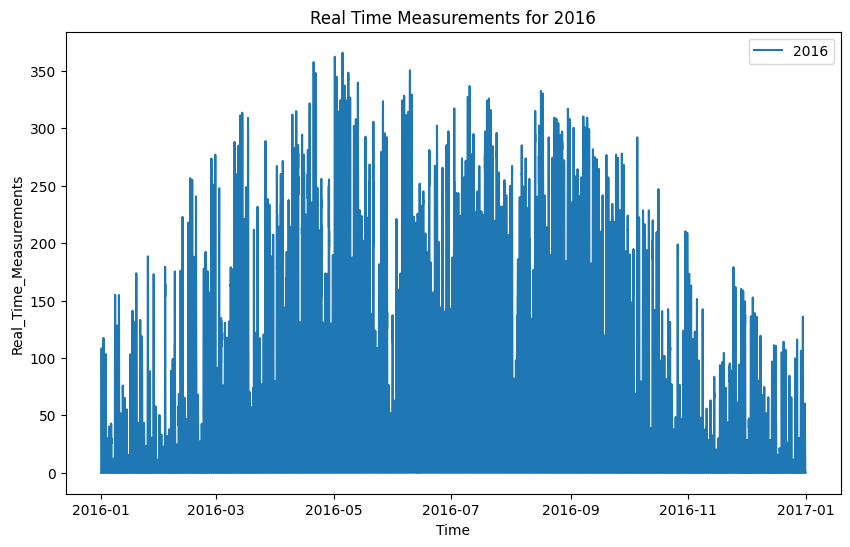

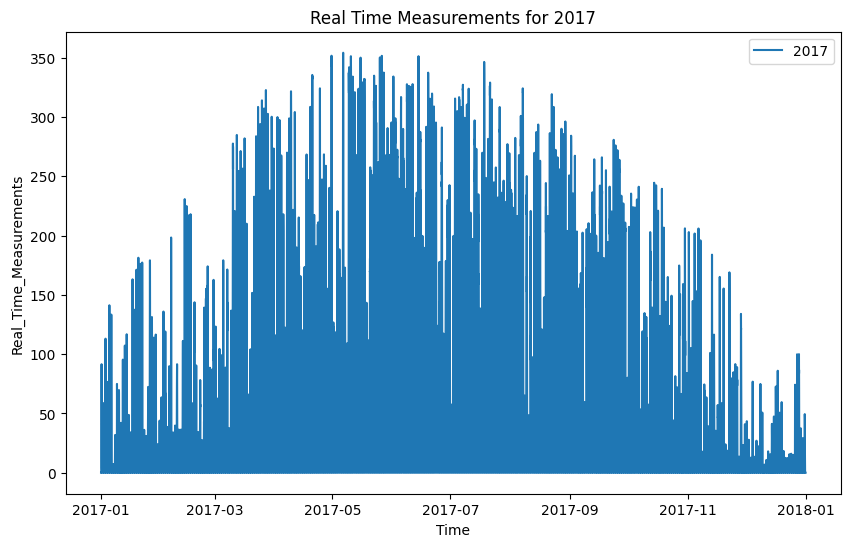

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# filter data for year 2013 to 2017
data = df[(df['Time'].dt.year >= 2013) & (df['Time'].dt.year <= 2017)]

# use time in x-axis and Real_Time_Measurements in y-axis
for year in range(2013, 2018):
    data_year = df[df['Time'].dt.year == year]
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Time', y='Real_Time_Measurement_MW', data=data_year, label=str(year))
    plt.xlabel('Time')
    plt.ylabel('Real_Time_Measurements')
    plt.title(f'Real Time Measurements for {year}')
    plt.legend()
    plt.show()

In [4]:
# calculate mean and variance of Real_Time_Measurements
# by splitting the data into 3
import csv

save_path = os.path.join(os.getcwd(), 'StationaryTest_results')

for year in range(2013, 2018):
    data_year = data[data['Time'].dt.year == year]
    
    data1 = data_year[data_year['Time'].dt.month <= 4]
    data2 = data_year[(data_year['Time'].dt.month > 4) & (data_year['Time'].dt.month <= 8)]
    data3 = data_year[data_year['Time'].dt.month > 8]

    means = []
    variances = []

    for data_split in [data1, data2, data3]:
        means.append(data_split['Real_Time_Measurement_MW'].mean())
        variances.append(data_split['Real_Time_Measurement_MW'].var())

    with open(os.path.join(save_path, f'results_means_variances_{year}.csv'), 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(['Year', 'Mean of data1', 'Mean of data2', 'Mean of data3', 'Variance of data1', 'Variance of data2', 'Variance of data3'])
        writer.writerow([year] + means + variances)

In [5]:
# check if data is stationary or not
# ADF
from statsmodels.tsa.stattools import adfuller

save_path = os.path.join(os.getcwd(), 'StationaryTest_results')

for year in range(2013, 2018):
    data_year = data[data['Time'].dt.year == year]
    adftest = adfuller(data_year['Real_Time_Measurement_MW'], autolag='AIC', regression='ct')
    
    with open(os.path.join(save_path, f'results_ADF_{year}.txt'), 'w') as f:
        f.write(f'Year: {year}\n')
        f.write(f'ADF Statistic: {adftest[0]}\n')
        f.write(f'p-value: {adftest[1]}\n')
        f.write(f'Number of lags used: {adftest[2]}\n')
        f.write(f'Number of observations used: {adftest[3]}\n')
        f.write('Critical Values:\n')
        for key, value in adftest[4].items():
            f.write(f'    {key}: {value}\n')
        f.write(f'AIC: {adftest[5]}\n')
        f.write('---\n')


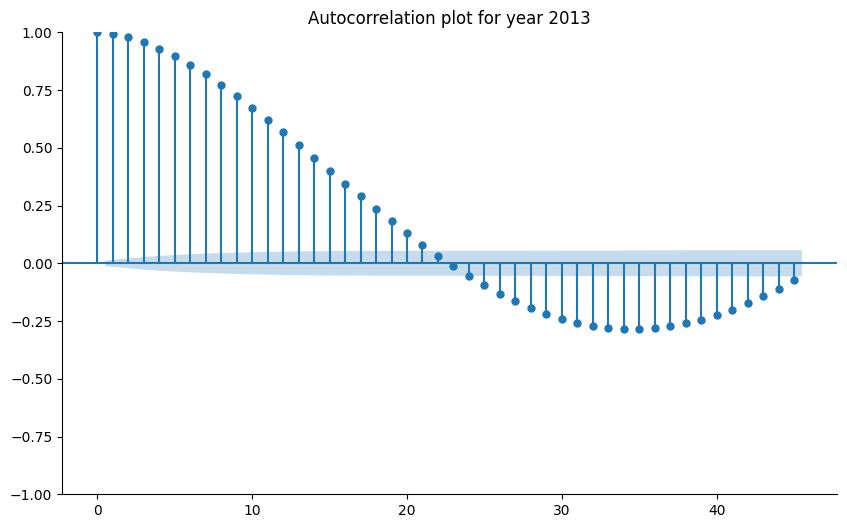

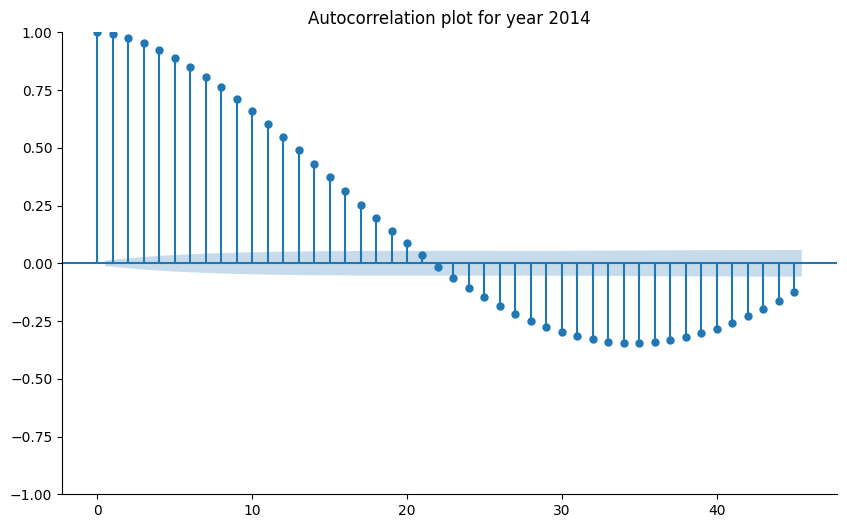

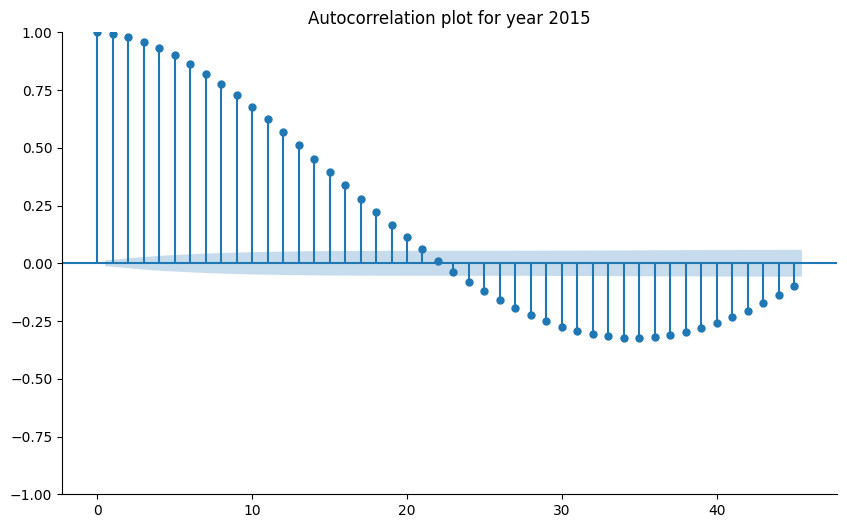

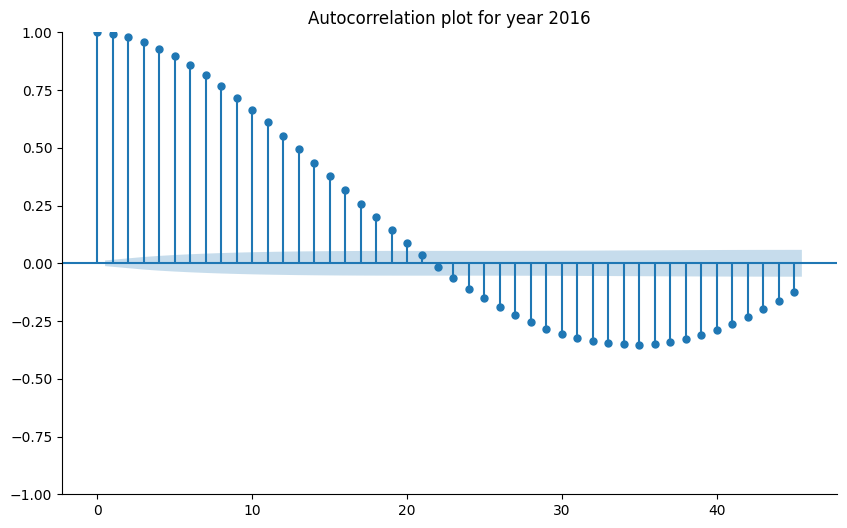

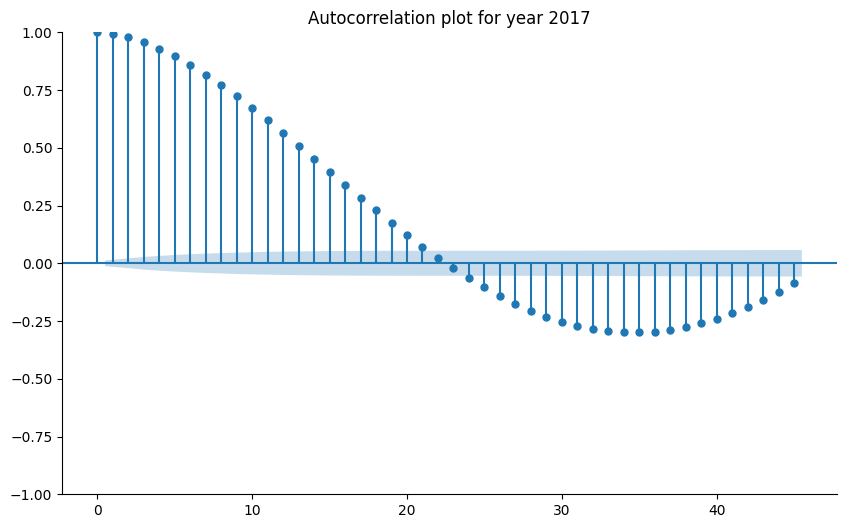

In [6]:
# autocorrelation function check
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

for year in range(2013, 2018):
    data_year = data[data['Time'].dt.year == year]
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_acf(data_year['Real_Time_Measurement_MW'], ax=ax)
    plt.title(f'Autocorrelation plot for year {year}')
    sns.despine()
    plt.show()

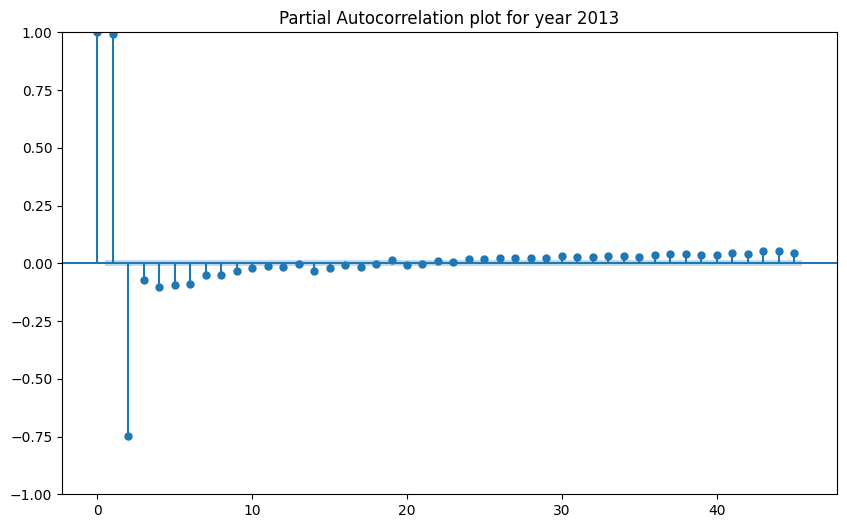

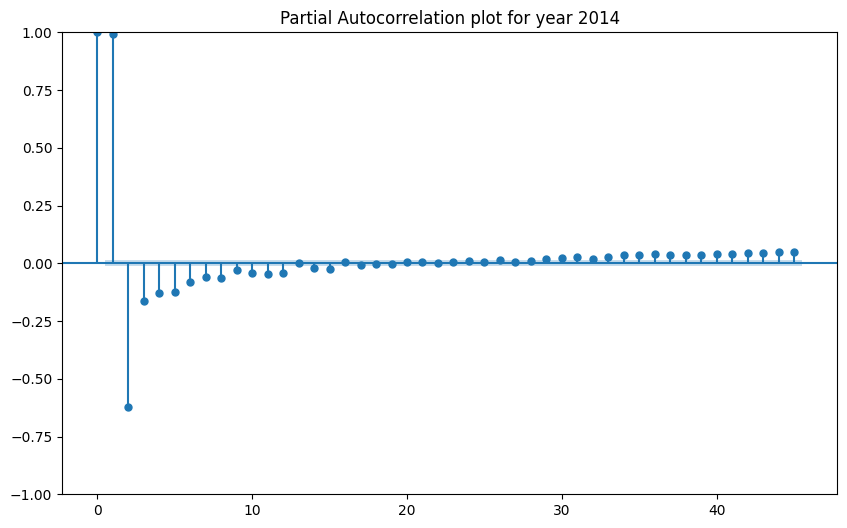

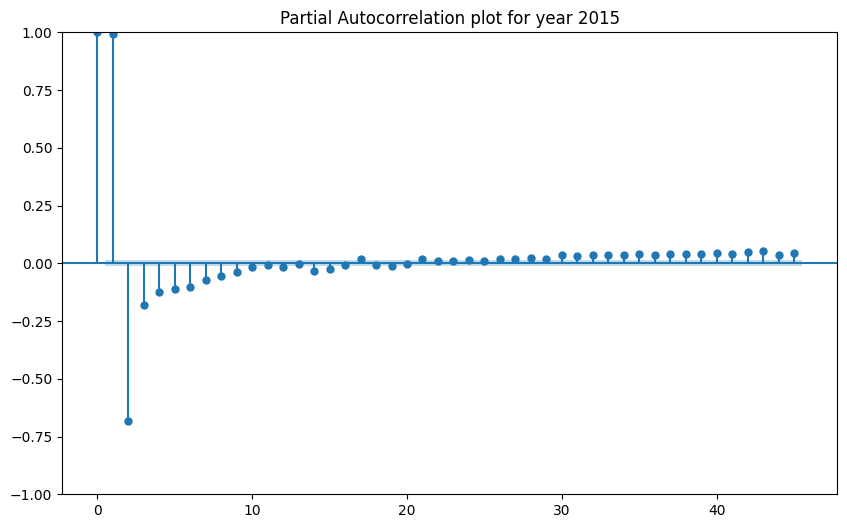

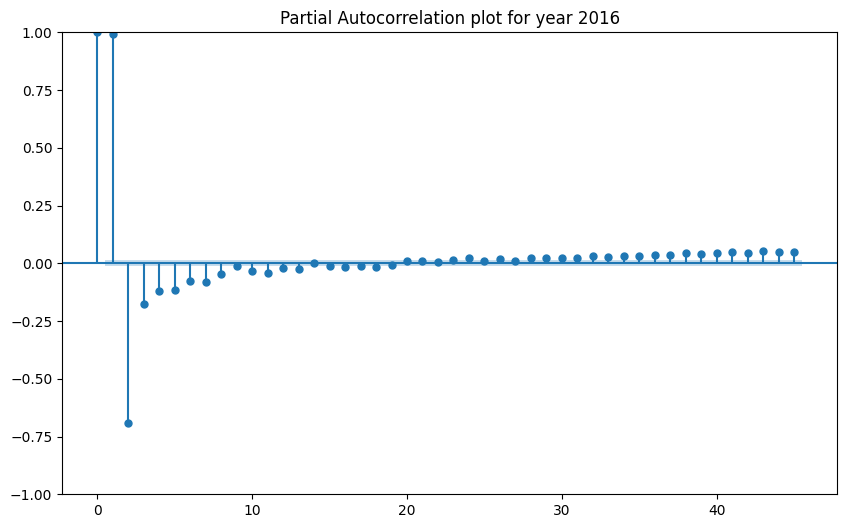

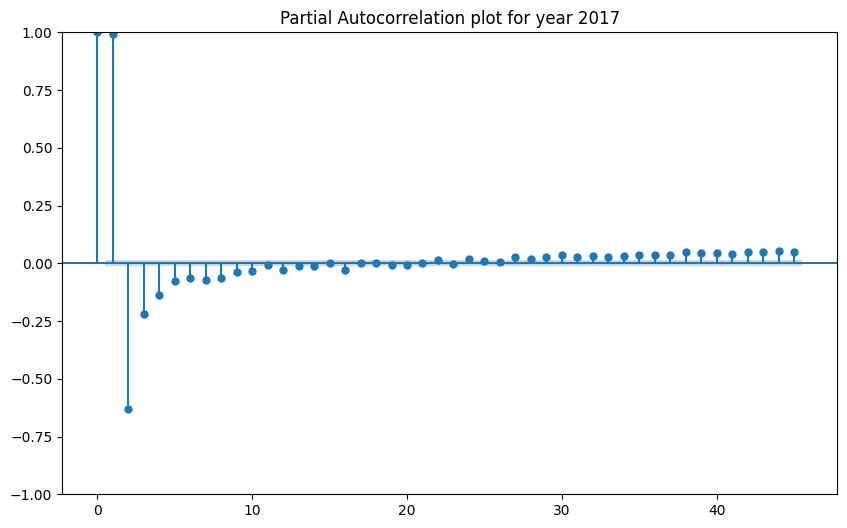

In [7]:
# partial autocorrelation function check
from statsmodels.graphics.tsaplots import plot_pacf

for year in range(2013, 2018):
    data_year = data[data['Time'].dt.year == year]
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_pacf(data_year['Real_Time_Measurement_MW'], ax=ax)
    plt.title(f'Partial Autocorrelation plot for year {year}')
    plt.show()

C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Month'] = season_data['Time'].dt.month
C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Day'] = season_data['Time'].dt.day
C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

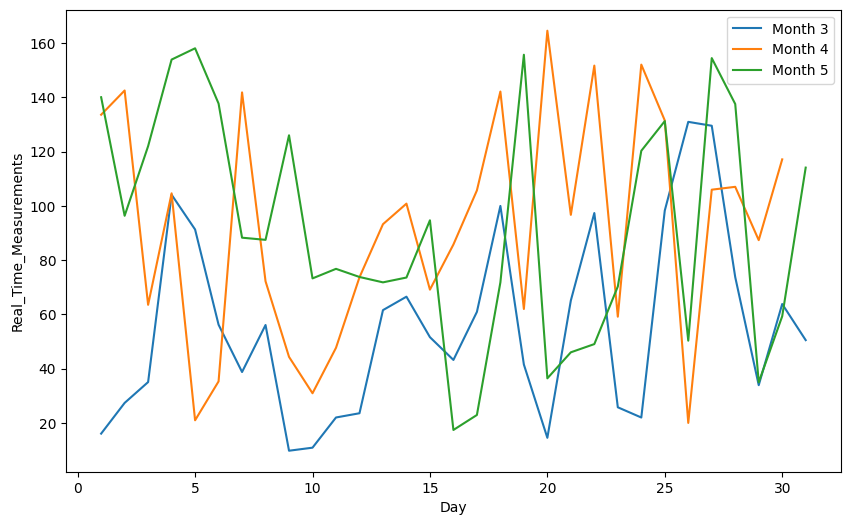

C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Month'] = season_data['Time'].dt.month
C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Day'] = season_data['Time'].dt.day
C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

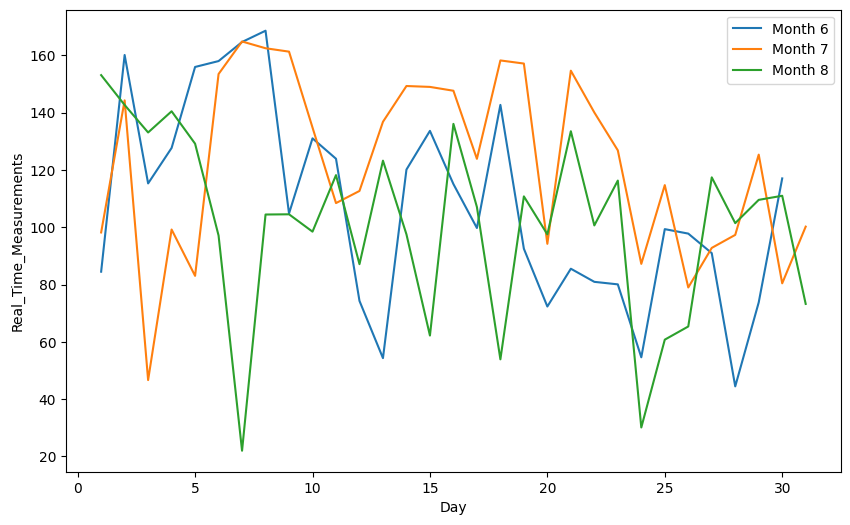

C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Month'] = season_data['Time'].dt.month
C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Day'] = season_data['Time'].dt.day
C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

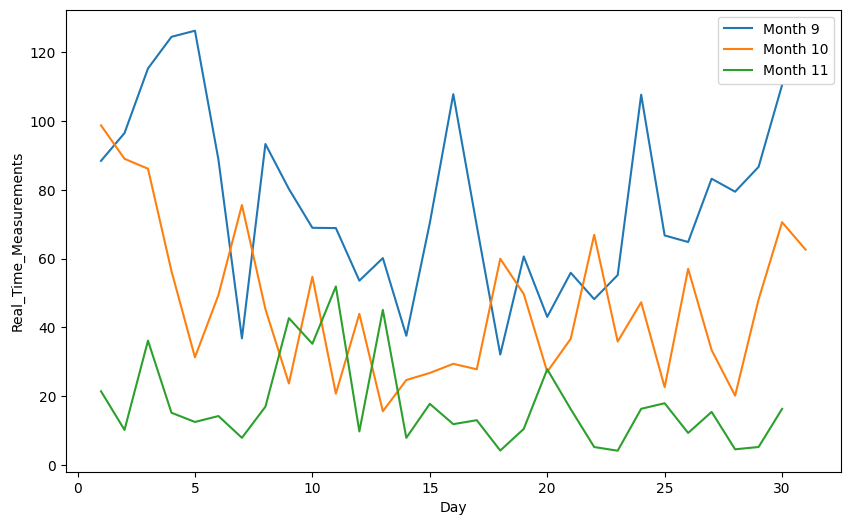

C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Month'] = season_data['Time'].dt.month
C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_data['Day'] = season_data['Time'].dt.day
C:\Users\krits\AppData\Local\Temp\ipykernel_17320\3093345115.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

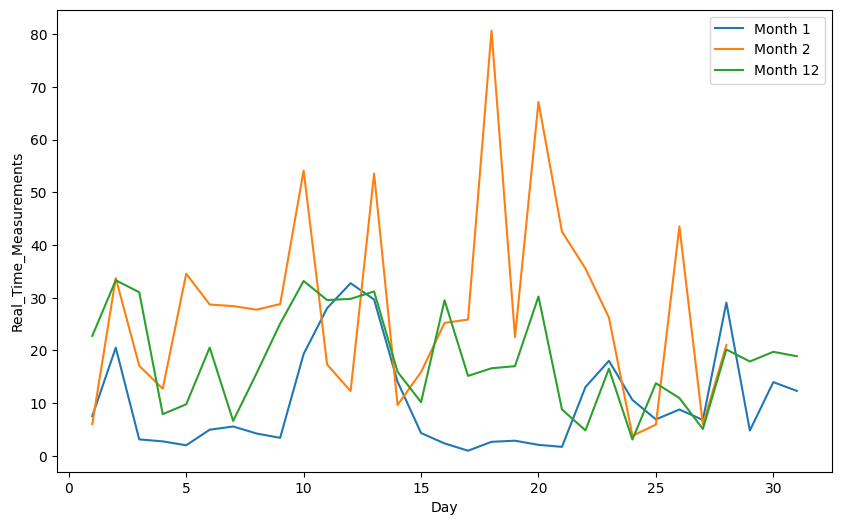

In [8]:
import seaborn as sns

def plot_seasonal_data(df, year, season, months):
    data_year = df[df['Time'].dt.year == year]
    season_data = data_year[data_year['Season'] == season]
    season_data['Month'] = season_data['Time'].dt.month
    season_data['Day'] = season_data['Time'].dt.day
    season_data['Day'] = pd.to_numeric(season_data['Day'])
    season_data = season_data.groupby(['Month', 'Day']).agg({'Real_Time_Measurement_MW': 'mean'}).reset_index()

    plt.figure(figsize=(10, 6))
    for month in months:
        data_month = season_data[season_data['Month'] == month]
        sns.lineplot(x='Day', y='Real_Time_Measurement_MW', data=data_month, label=f'Month {month}')
    plt.xlabel('Day')
    plt.ylabel('Real_Time_Measurements')
    plt.legend(loc='upper right')
    plt.show()

# Plot for each season in 2013
plot_seasonal_data(df, 2013, 'Spring', [3, 4, 5])
plot_seasonal_data(df, 2013, 'Summer', [6, 7, 8])
plot_seasonal_data(df, 2013, 'Autumn', [9, 10, 11])
plot_seasonal_data(df, 2013, 'Winter', [1, 2, 12])

C:\Users\krits\AppData\Local\Temp\ipykernel_17320\1805365956.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['Month'] = data_year['Time'].dt.month
C:\Users\krits\AppData\Local\Temp\ipykernel_17320\1805365956.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_year['Day'] = data_year['Time'].dt.day


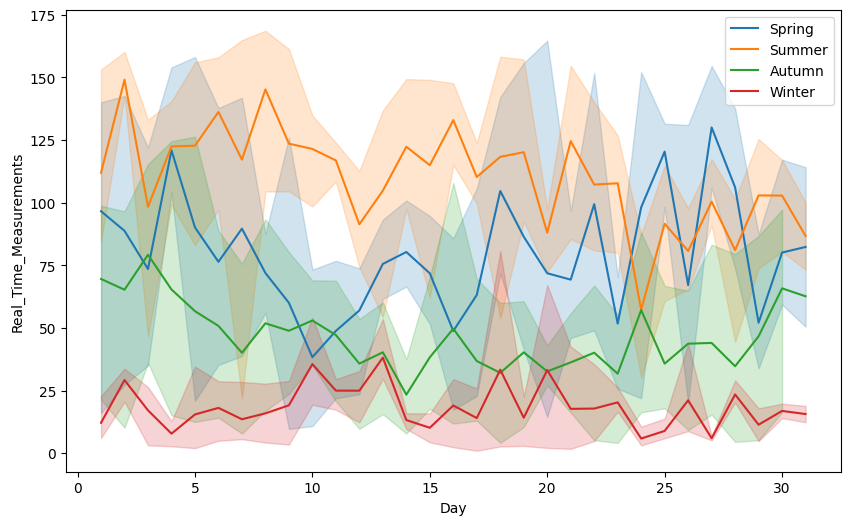

In [9]:
# plot all seasons in 2013 in one plot
data_year = df[df['Time'].dt.year == 2013]
data_year['Month'] = data_year['Time'].dt.month
data_year['Day'] = data_year['Time'].dt.day
season_data = data_year.groupby(['Season', 'Month', 'Day']).agg({'Real_Time_Measurement_MW': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    data_season = season_data[season_data['Season'] == season]
    sns.lineplot(x='Day', y='Real_Time_Measurement_MW', data=data_season, label=season)

plt.xlabel('Day')
plt.ylabel('Real_Time_Measurements')
plt.legend(loc='upper right')
plt.show()